In [9]:
from requests import get
from bs4 import BeautifulSoup
import os
import re
import acquire, prepare
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix
import prepare2

In [2]:
#url = 'https://github.com/topics/awesome'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [3]:
#soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
#repo = soup.find_all('h3', class_='f3 color-text-secondary text-normal lh-condensed')

In [5]:
#repo

In [6]:
#repo = soup.find_all('a', class_='text-bold')

In [7]:
#[i['href'] for i in repo]

In [8]:
#url = 'https://github.com/topics/awesome?l=javascript'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [9]:
#soup = BeautifulSoup(response.text, 'html.parser')

In [10]:
#repo = soup.find_all('a', class_ = 'text-bold')

In [11]:
#js = [i['href'] for i in repo]

In [12]:
#js

In [13]:
#url = 'https://github.com/topics/awesome?l=python'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [14]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [15]:
#py = [i['href'] for i in repo]

In [16]:
#py

In [17]:
#url = 'https://github.com/topics/awesome?l=html'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [18]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [19]:
#html = [i['href'] for i in repo]

In [20]:
#html

In [21]:
#url = 'https://github.com/topics/awesome?l=shell'
#headers = {'User-Agent': 'Codeup Data Science'} # Some websites don't accept the pyhon-requests default user-agent
#response = get(url, headers=headers)

In [22]:
#soup = BeautifulSoup(response.text, 'html.parser')
#repo = soup.find_all('a', class_ = 'text-bold')

In [23]:
#shell = [i['href'] for i in repo]

In [24]:
#shell

In [25]:
#repos = [js + py + html + shell]

In [26]:
#repos = repos[0]

In [27]:
#repos

In [28]:
#pd.DataFrame(acquire.scrape_github_data())

In [166]:
repo_df = acquire.get_github_data(cached = True)

In [167]:
repo_df

,repo,language,readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
1,/jaywcjlove/awesome-mac,JavaScript,Awesome Mac\n----\n<!--rehype:style=font-size:...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi..."
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3..."
4,/ascoders/weekly,JavaScript,"# 前端精读\n\n<a href=""https://travis-ci.org/ascod..."
...,...,...,...
115,/buren/awesome-sweden,Shell,# Sweden [![awesome](https://awesome.re/badge-...
116,/jeffreytse/jekyll-deploy-action,Shell,"<div align=""center"">\n <br>\n\n <a href=""htt..."
117,/tajmone/awesome-interactive-fiction,Shell,= Awesome Interactive Fiction link:https://awe...
118,/stve/awesome-dropwizard,Shell,# Awesome Dropwizard [![Awesome](https://cdn.r...


In [168]:
from markdown import markdown

In [169]:
repo_df

,repo,language,readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...
1,/jaywcjlove/awesome-mac,JavaScript,Awesome Mac\n----\n<!--rehype:style=font-size:...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi..."
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3..."
4,/ascoders/weekly,JavaScript,"# 前端精读\n\n<a href=""https://travis-ci.org/ascod..."
...,...,...,...
115,/buren/awesome-sweden,Shell,# Sweden [![awesome](https://awesome.re/badge-...
116,/jeffreytse/jekyll-deploy-action,Shell,"<div align=""center"">\n <br>\n\n <a href=""htt..."
117,/tajmone/awesome-interactive-fiction,Shell,= Awesome Interactive Fiction link:https://awe...
118,/stve/awesome-dropwizard,Shell,# Awesome Dropwizard [![Awesome](https://cdn.r...


In [100]:
repo_df = repo_df.drop(labels=[1,4,12,18,19,28,31,44,54,67,68,72,74,79,81,87,95], axis=0)

In [101]:
print(repo_df.iloc[35:36])

                     repo language  \
42  /rossant/awesome-math   Python   

                                      readme_contents  
42  # Awesome Math [![Awesome](https://cdn.rawgit....  


In [102]:
repo_df = repo_df.dropna()

In [103]:
repo_df.shape

(102, 3)

In [104]:
repo_clean = prepare.prep_article_data(repo_df, 'readme_contents', extra_words = ['fr','freesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediafreesvg','opensourcesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediaopensourcesvg'])

KeyError: '[ 1  4 12 18 19 28 31 44 54 67 68 72 74 79 81 87 95] not found in axis'

In [105]:
repo_clean.head(10)

,repo,language,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesomeselfhosted awesomehttpscdnrawgitcomsind...,awesomeselfhost awesomehttpscdnrawgitcomsindre...,awesomeselfhosted awesomehttpscdnrawgitcomsind...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi...",div classhiddeninpage awesome design tools awe...,div classhiddeninpag awesom design tool awesom...,div classhiddeninpage awesome design tool awes...
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3...",br div aligncenter img width380px srchttpsrawg...,br div aligncent img width380px srchttpsrawgit...,br div aligncenter img width380px srchttpsrawg...
5,/davidsonfellipe/awesome-wpo,JavaScript,# Awesome WPO [![Awesome](https://cdn.rawgit.c...,awesome wpo awesomehttpscdnrawgitcomsindresorh...,awesom wpo awesomehttpscdnrawgitcomsindresorhu...,awesome wpo awesomehttpscdnrawgitcomsindresorh...
6,/shekhargulati/52-technologies-in-2016,JavaScript,\n52 technologies in 2016 [![GitHub Stats](htt...,52 technologies 2016 github statshttpsimgshiel...,52 technolog 2016 github statshttpsimgshieldsi...,52 technology 2016 github statshttpsimgshields...
7,/hackerkid/Mind-Expanding-Books,JavaScript,"# Mind Expanding Books\n\n\n<h2 align=""center...",mind expanding books h2 aligncenter check late...,mind expand book h2 aligncent check latest pro...,mind expanding book h2 aligncenter check lates...
8,/apsdehal/awesome-ctf,JavaScript,# Awesome CTF [![Build Status](https://travis-...,awesome ctf build statushttpstravisciorgapsdeh...,awesom ctf build statushttpstravisciorgapsdeha...,awesome ctf build statushttpstravisciorgapsdeh...
9,/imfunniee/gitfolio,JavaScript,"<img src=""https://i.imgur.com/eA6clZr.png"">\n\...",img srchttpsiimgurcomea6clzrpng gitfolio tweet...,img srchttpsiimgurcomea6clzrpng gitfolio tweet...,img srchttpsiimgurcomea6clzrpng gitfolio tweet...
10,/Kristories/awesome-guidelines,JavaScript,"<p align=""center"">\n <img alt=""Awesome Guid...",p aligncenter img altawesome guidelines srcass...,p aligncent img altawesom guidelin srcassetshe...,p aligncenter img altawesome guideline srcasse...
11,/swapagarwal/swag-for-dev,JavaScript,# swag-for-dev\n\n[![Build Status](https://git...,swagfordev build statushttpsgithubcomswapagarw...,swagfordev build statushttpsgithubcomswapagarw...,swagfordev build statushttpsgithubcomswapagarw...


In [106]:
#soup = BeautifulSoup(repo_clean.readme_contents.iloc[35])

In [107]:
#def remove_html(value):
#    html = markdown(value)
#    html = re.sub(r'<pre>(.*?)</pre>', ' ', html)
#    html = re.sub(r'<code>(.*?)</code >', ' ', html)
#    soup = BeautifulSoup(html, "html.parser")
#    text = ''.join(soup.findAll(text=True))
#    text = text.strip().replace('\n', ' ')
#    return text

In [149]:
# Create dataframes specific to programming language
java = repo_clean[repo_clean.language=='JavaScript']
python = repo_clean[repo_clean.language=='Python']
HTML = repo_clean[repo_clean.language=='HTML']
shell = repo_clean[repo_clean.language=='Shell']#def remove_all_html(df):
    #Apply remove_html to each cell in the column. Maybe iterate? Need to figure out how to use .loc for it
    # Then we need to replace each value in the cell with markdown removed
    # return the cleaned df.
#    return df

In [153]:
# create strings out of the lemmatized contenst from each dataframe
all_words = ' '.join(repo_clean.lemmatized_readme_contents)
java_words = ' '.join(java.lemmatized_readme_contents)
python_words = ' '.join(python.lemmatized_readme_contents)
HTML_words = ' '.join(HTML.lemmatized_readme_contents)
shell_words = ' '.join(shell.lemmatized_readme_contents)

# Start Here

In [154]:
documents = {'java': java_words,
            'python': python_words,
            'HTML': HTML_words,
            'shell': shell_words}

In [155]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for doc in documents.values() if word in doc])
    return len(documents) / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# put the unique words into a data frame
dfx = (pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=True))

In [164]:
stop_words = dfx[dfx.idf<2]

In [170]:
repo_clean2 = prepare.prep_article_data(repo_df, 'readme_contents', extra_words = stop_words)

In [171]:
repo_clean2.head()

,repo,language,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents
0,/awesome-selfhosted/awesome-selfhosted,JavaScript,# Awesome-Selfhosted\n\n[![Awesome](https://cd...,awesomeselfhosted selfhosting practice locally...,awesomeselfhost selfhost practic local host ma...,awesomeselfhosted selfhosting practice locally...
2,/goabstract/Awesome-Design-Tools,JavaScript,"<div class=""hidden-in-page"">\n\n# Awesome Desi...",awesome design tools awesome design pluginshtt...,awesom design tool awesom design pluginshttpsg...,awesome design tool awesome design pluginshttp...
3,/viatsko/awesome-vscode,JavaScript,"\n<br/>\n<div align=""center"">\n <img width=""3...",curated list delightful visual studio codehttp...,curat list delight visual studio codehttpscode...,curated list delightful visual studio codehttp...
5,/davidsonfellipe/awesome-wpo,JavaScript,# Awesome WPO [![Awesome](https://cdn.rawgit.c...,awesome wpo curated list web performance optim...,awesom wpo curat list web perform optim everyo...,awesome wpo curated list web performance optim...
6,/shekhargulati/52-technologies-in-2016,JavaScript,\n52 technologies in 2016 [![GitHub Stats](htt...,52 technologies 2016 taken challenge learn new...,52 technolog 2016 taken challeng learn new tec...,52 technology 2016 taken challenge learn new t...


In [109]:
#remove_html(repo_clean.readme_contents.iloc[35])

In [110]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [172]:
train, validate, test = train_validate_test_split(repo_clean2, 'language')

In [173]:
train.language.value_counts()

Shell         16
Python        15
JavaScript    13
HTML          12
Name: language, dtype: int64

In [174]:
all_words = ' '.join(train.cleaned_readme_contents)

In [175]:
pd.Series(data = all_words.split()).value_counts().head(30)

git         1669
open        1522
install     1513
clone       1132
month       1084
pip         1061
ago         1003
years        945
code         670
web          660
data         635
python       609
mit          600
using        575
source       546
theme        507
library      503
2            490
0            486
c            485
fr           470
tool         469
1            467
use          461
2017         452
3            448
tools        443
language     442
design       421
free         408
dtype: int64

In [176]:
py_words = ' '.join(train[train['language'] == 'Python'].cleaned_readme_contents)

In [177]:
pd.Series(py_words.split()).value_counts().head(30)

install       1453
open          1164
git           1118
clone         1110
month         1073
pip           1058
ago           1000
years          911
mit            594
0              480
python         467
c              404
1              384
apache2        383
library        380
conda          372
2              358
condaforge     356
3              348
wagtail        334
language       313
8              309
6              304
bsd3           292
channels       279
english        276
4              275
notable        274
9              267
10             258
dtype: int64

In [178]:
shell_words = ' '.join(train[train['language'] == 'Shell'].cleaned_readme_contents)

In [179]:
pd.Series(shell_words.split()).value_counts().head(30)

git            514
fr             470
2017           423
theme          406
zsh            371
status         323
2018           307
web            287
command        276
plugin         271
airflow        268
includes       263
decorations    247
using          237
linux          227
best           227
list           226
time           217
code           214
tools          210
de             206
free           203
use            199
data           197
open           196
based          195
news           191
weekly         185
online         183
software       180
dtype: int64

In [180]:
js_words = ' '.join(train[train['language'] == 'JavaScript'].cleaned_readme_contents)

In [181]:
pd.Series(js_words.split()).value_counts().head(30)

freesvghttpsgithubcomlisadziubaawesomedesigntoolsblobmastermediafreesvg    302
covid19                                                                    280
code                                                                       256
design                                                                     225
coronavirus                                                                164
free                                                                       162
tool                                                                       159
data                                                                       152
tools                                                                      134
use                                                                        129
create                                                                     121
app                                                                        112
guide                                               

In [182]:
html_words = ' '.join(train[train['language'] == 'HTML'].cleaned_readme_contents)

In [183]:
pd.Series(html_words.split()).value_counts().head(30)

kubernetes     241
webpack        232
podcast        226
hugo           157
source         154
ipfs           142
maintainer     135
loader         105
open            91
using           90
web             89
wardley         82
de              81
plugin          73
software        72
data            71
service         70
development     69
creative        66
code            64
distributed     64
tool            64
platform        64
mapping         64
webgl           64
coding          62
cloud           61
programming     61
developers      53
javascript      49
dtype: int64

#### Value Count takeaways:

- something with our prep seems to be missing a strange encoding `&#9`
- HTML seems the most different in terms of word overlap
- Python must have really long readmes, but I will test with a len() later
    - Python also has a lot of 0 and 1, which makes sense as it is used as indexer variables
- code is another one that has a lot of overlap
- Python is included in all of the languages except for shell

In [184]:
train['length'] = [len(i) for i in train.cleaned_readme_contents]

In [185]:
train[train.language == 'Python'].mean()

length    42318.066667
dtype: float64

In [186]:
train[train.language == 'Shell'].mean()

length    36898.3125
dtype: float64

In [187]:
train[train.language == 'JavaScript'].mean()

length    27144.769231
dtype: float64

In [188]:
train[train.language == 'HTML'].mean()

length    13578.916667
dtype: float64

In [189]:
train.groupby(by = 'language').mean()

,length
language,
HTML,13578.916667
JavaScript,27144.769231
Python,42318.066667
Shell,36898.312500


Length Takeaways:
- Python has the largest average character count 
- JavaScript and Shell have somewhat equal character counts
- HTML has the least amount

In [190]:
train.groupby(by = 'language').nunique()

,repo,readme_contents,cleaned_readme_contents,stemmed_readme_contents,lemmatized_readme_contents,length
language,,,,,,
HTML,12,12,12,12,12,12
JavaScript,13,13,13,13,13,13
Python,15,15,15,15,15,15
Shell,16,16,16,16,16,16


In [191]:
train.groupby(by = 'language')

In [192]:
def unique(list_):
    unique_list = []
    for x in list_:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [193]:
py_unique = unique(pd.Series(data = py_words.split()))
shell_unique = unique(pd.Series(data = shell_words.split()))
js_unique = unique(pd.Series(data = js_words.split()))
html_unique = unique(pd.Series(data = html_words.split()))

Unique Takeaways:
- HTML has the least amount of unique words whereas Shell has the most
- Javascript and Python make up the middle

<AxesSubplot:>

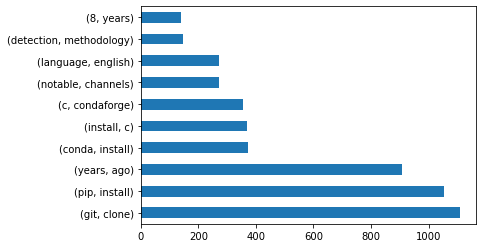

In [194]:
pd.Series(nltk.bigrams(py_words.split())).value_counts().head(10).plot.barh()

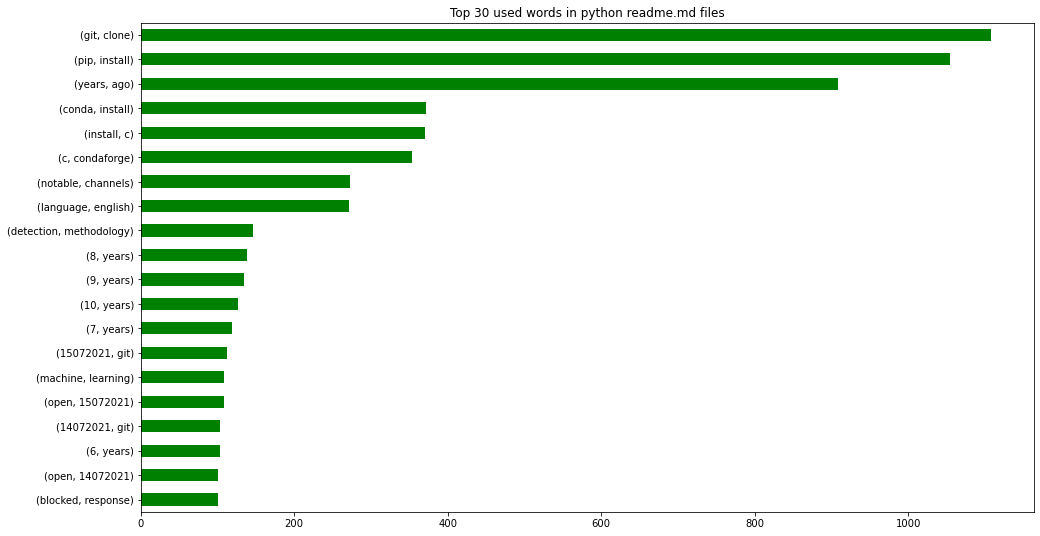

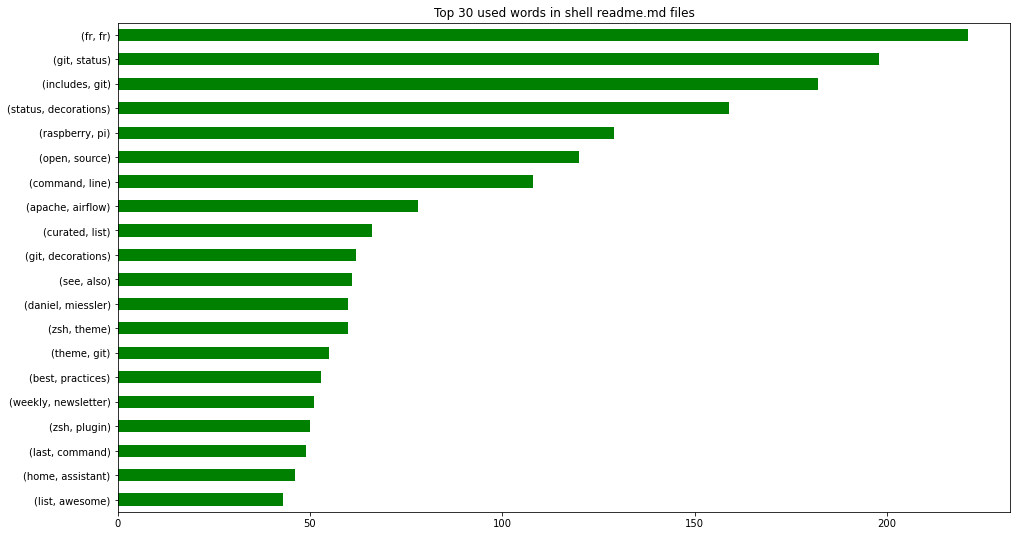

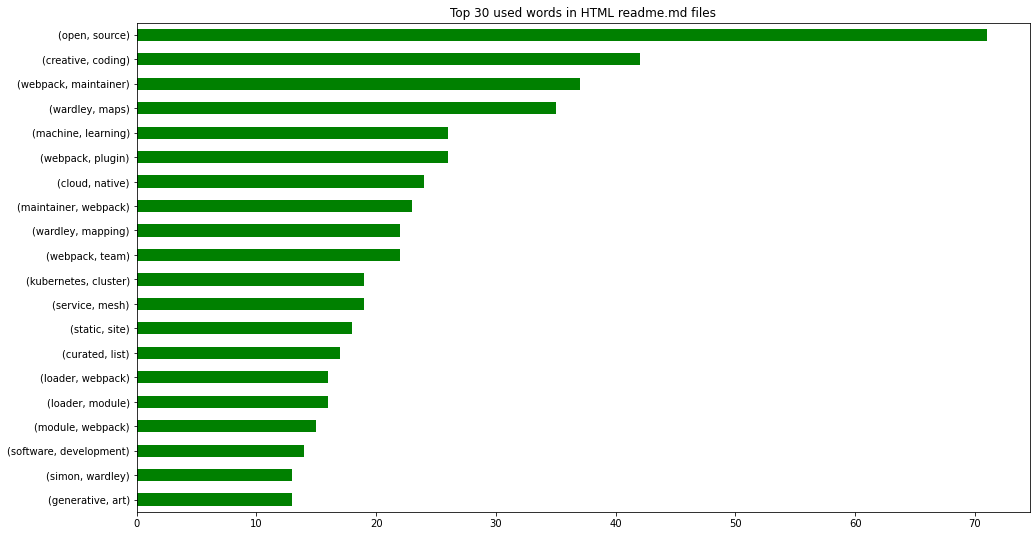

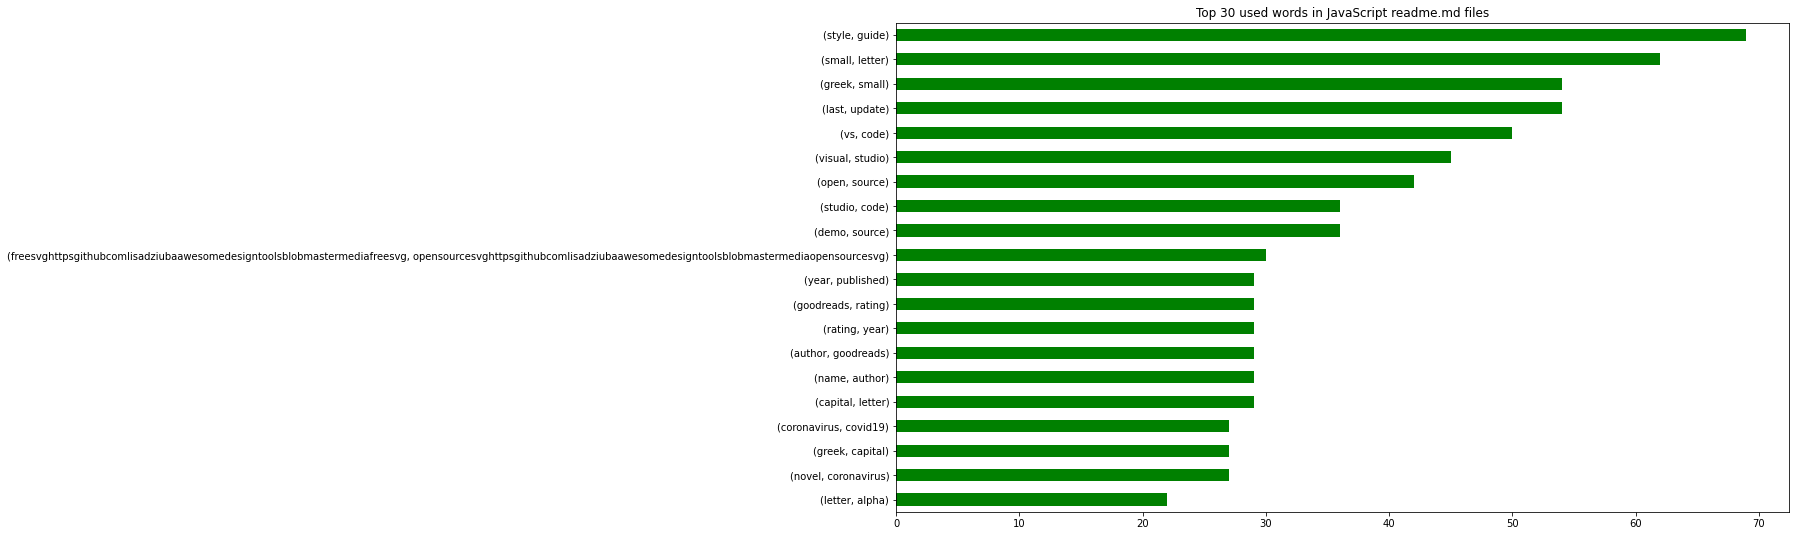

In [195]:
lang_words = {'python':py_words,
              'shell':shell_words,
              'HTML':html_words,
              'JavaScript':js_words}
for key, value in lang_words.items():
    plt.figure(figsize=(16, 9), )
    pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
    plt.title(f'Top 30 used words in {key} readme.md files')
    plt.show()

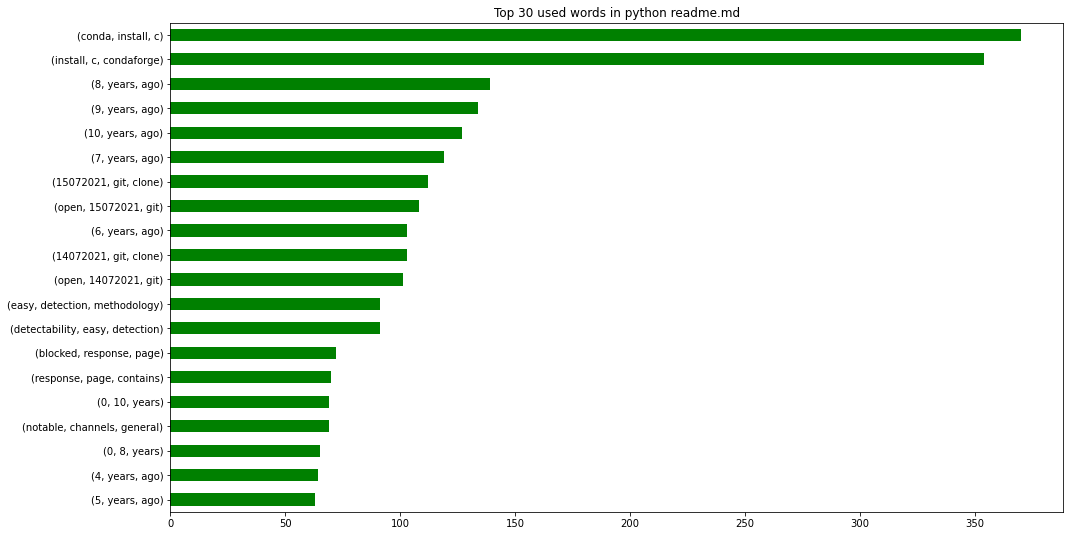

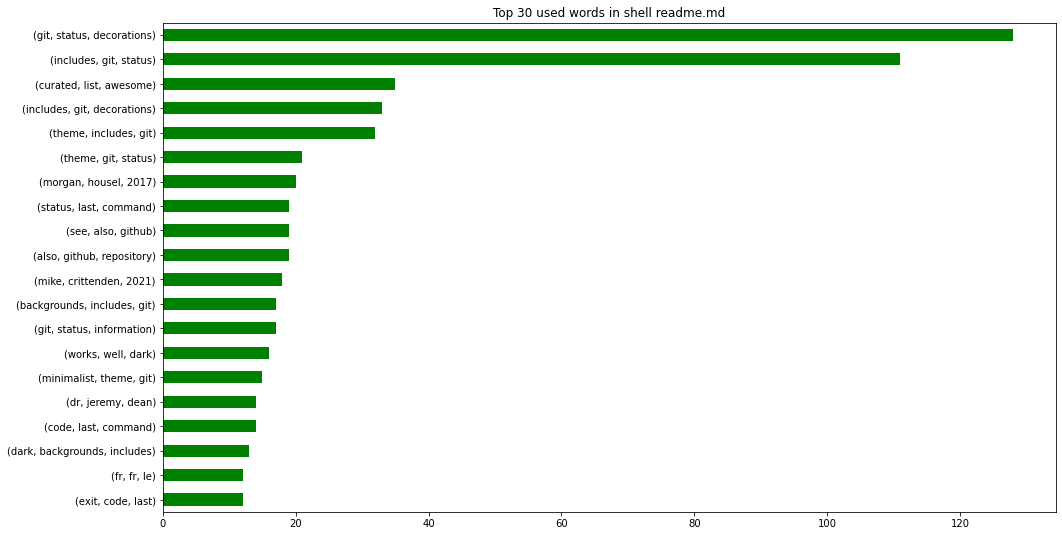

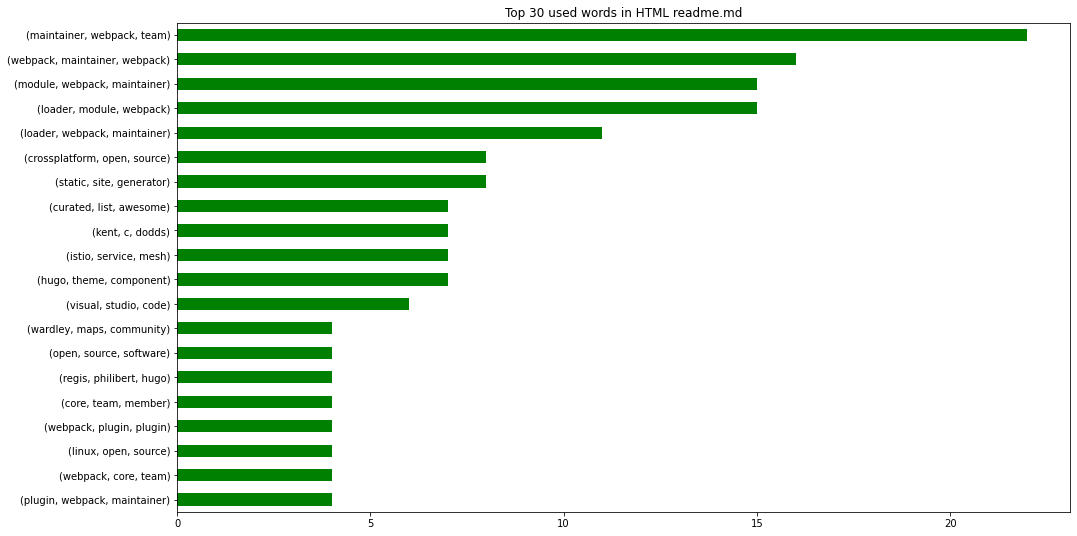

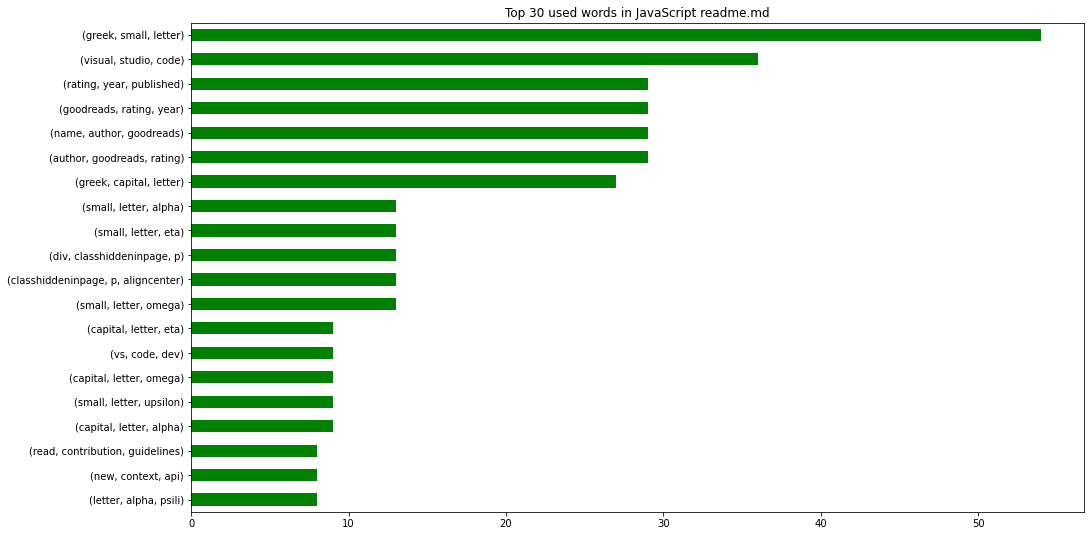

In [196]:
lang_words = {'python':py_words,
              'shell':shell_words,
              'HTML':html_words,
              'JavaScript':js_words}
for key, value in lang_words.items():
    plt.figure(figsize=(16, 9))
    pd.Series(nltk.trigrams(value.split())).value_counts(ascending = True).tail(20).plot.barh(color = 'green')
    plt.title(f'Top 30 used words in {key} readme.md')
    plt.show()

In [197]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 140
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(80, 200)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

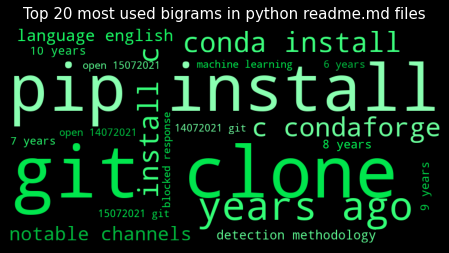

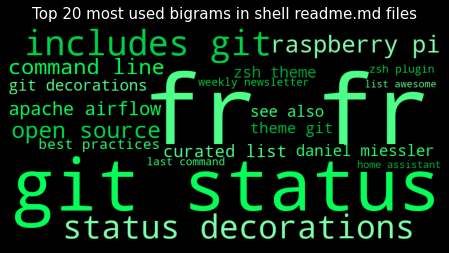

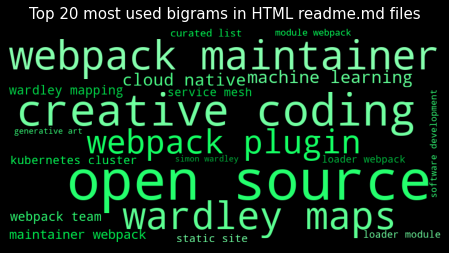

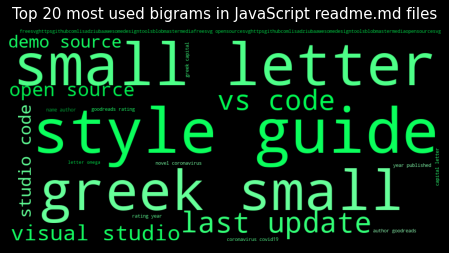

In [198]:
from wordcloud import WordCloud
for key, value in lang_words.items():
    data = {k[0] + ' ' + k[1]: v for k, v in pd.Series(nltk.bigrams(value.split()))\
                                                       .value_counts().head(20)\
                                                       .to_dict().items()}
    img = WordCloud(background_color= None, 
                    width=800, 
                    height=400, 
                    mode = 'RGBA', 
                    color_func = random_color_func,
                    max_words = 20).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4), edgecolor = 'black', facecolor = 'black')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top 20 most used bigrams in {key} readme.md files', pad = 10, fontdict ={'fontsize':  15, 'color': 'white'})
    plt.show()

In [199]:
pd.Series(nltk.bigrams(value.split())).value_counts(ascending = True).tail(20)

(letter, alpha)                                                                                                                                                   22
(novel, coronavirus)                                                                                                                                              27
(greek, capital)                                                                                                                                                  27
(coronavirus, covid19)                                                                                                                                            27
(capital, letter)                                                                                                                                                 29
(name, author)                                                                                                                                                    29
(author, g

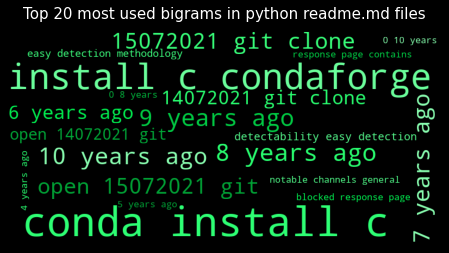

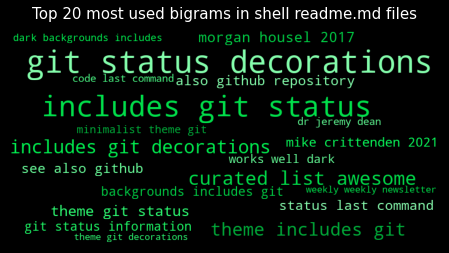

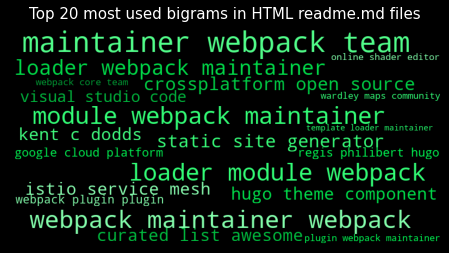

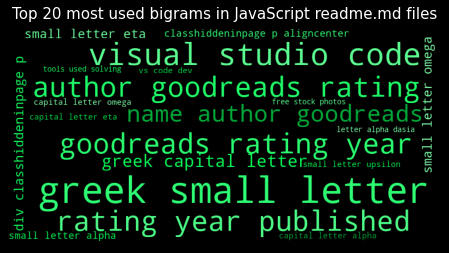

In [200]:
for key, value in lang_words.items():
    data = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in pd.Series(nltk.trigrams(value.split()))\
                                                       .value_counts().head(20)\
                                                       .to_dict().items()}
    img = WordCloud(background_color= None, 
                    width=800, 
                    height=400, 
                    mode = 'RGBA', 
                    color_func = random_color_func,
                    max_words = 20).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4), edgecolor = 'black', facecolor = 'black')
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Top 20 most used bigrams in {key} readme.md files', pad = 10, fontdict ={'fontsize':  15, 'color': 'white'})
    plt.show()

## Now Vogue: Modeling 

In [201]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix

cv = CountVectorizer()
bag_of_words = cv.fit_transform(train.lemmatized_readme_contents)
bag_of_words

<56x35769 sparse matrix of type '<class 'numpy.int64'>'
	with 67065 stored elements in Compressed Sparse Row format>

In [202]:
from pprint import pprint
pprint(train.lemmatized_readme_contents)
pd.DataFrame(bag_of_words.todense(), columns=cv.get_feature_names())

86     title awesome geek podcasts permalink awesome ...
61     awesome creative coding carefully curated list...
73     ic security tool tip trade developed community...
112    awesome 5g curated list awesome 5g framework l...
43     awesome waf everything web application firewal...
52     awesome wagtail curated list awesome package a...
53     markdownlintdisable bestof web development pyt...
17     awesome browser extension github number update...
115    sweden list curated list awesome thing use cod...
103    macos io security related tool content macos s...
8      awesome ctf curated list capture flag ctf fram...
38     markdownlintdisable bestof machine learning py...
37     typeface source code beautification main font ...
71     awesome cloud native curated list opensource c...
63     webpack module bundler webpack take module dep...
85     awesome identity awesome identity singlepage h...
14     lint disable awesomeheading awesomegitrepoage ...
2      awesome design tool awes

,000,0000,0001f596,01,01012021,01022021,01032020,01032021,01042019,01042020,...,zwj,zwnj,zwsh,zxf,zxing,zy6pcovid19dashboard,zys,zytrax,zzapper,zzs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,1,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(train.lemmatized_readme_contents)

pprint(train.lemmatized_readme_contents)
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

86     title awesome geek podcasts permalink awesome ...
61     awesome creative coding carefully curated list...
73     ic security tool tip trade developed community...
112    awesome 5g curated list awesome 5g framework l...
43     awesome waf everything web application firewal...
52     awesome wagtail curated list awesome package a...
53     markdownlintdisable bestof web development pyt...
17     awesome browser extension github number update...
115    sweden list curated list awesome thing use cod...
103    macos io security related tool content macos s...
8      awesome ctf curated list capture flag ctf fram...
38     markdownlintdisable bestof machine learning py...
37     typeface source code beautification main font ...
71     awesome cloud native curated list opensource c...
63     webpack module bundler webpack take module dep...
85     awesome identity awesome identity singlepage h...
14     lint disable awesomeheading awesomegitrepoage ...
2      awesome design tool awes

,000,0000,0001f596,01,01012021,01022021,01032020,01032021,01042019,01042020,...,zwj,zwnj,zwsh,zxf,zxing,zy6pcovid19dashboard,zys,zytrax,zzapper,zzs
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.003363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.001236,0.001236,0.000000,0.002472,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [204]:
cv = CountVectorizer(ngram_range=(2, 2))
bigram_of_words = cv.fit_transform(train.lemmatized_readme_contents)

In [205]:
pprint(train.lemmatized_readme_contents)
pd.DataFrame(bigram_of_words.todense(), columns=cv.get_feature_names())

86     title awesome geek podcasts permalink awesome ...
61     awesome creative coding carefully curated list...
73     ic security tool tip trade developed community...
112    awesome 5g curated list awesome 5g framework l...
43     awesome waf everything web application firewal...
52     awesome wagtail curated list awesome package a...
53     markdownlintdisable bestof web development pyt...
17     awesome browser extension github number update...
115    sweden list curated list awesome thing use cod...
103    macos io security related tool content macos s...
8      awesome ctf curated list capture flag ctf fram...
38     markdownlintdisable bestof machine learning py...
37     typeface source code beautification main font ...
71     awesome cloud native curated list opensource c...
63     webpack module bundler webpack take module dep...
85     awesome identity awesome identity singlepage h...
14     lint disable awesomeheading awesomegitrepoage ...
2      awesome design tool awes

,000 free,000 multiline,000 video,0000 ist,0001f596 utf32le,01 adding,01012021 git,01012021 pip,01022021 conda,01022021 git,...,zwnj used,zwsh zpm3wordstar,zxf xxh,zxing read,zy6pcovid19dashboard vue3,zys similar,zytrax survival,zzapper best,zzs facebook,zzs home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
# Setup our X variables
X_train = train.lemmatized_readme_contents
X_validate = validate.lemmatized_readme_contents
X_test = test.lemmatized_readme_contents

# Setup our y variables
y_train = train.language
y_validate = validate.language
y_test = test.language

In [207]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [208]:
X_train.head()

86     title awesome geek podcasts permalink awesome ...
61     awesome creative coding carefully curated list...
73     ic security tool tip trade developed community...
112    awesome 5g curated list awesome 5g framework l...
43     awesome waf everything web application firewal...
Name: lemmatized_readme_contents, dtype: object

In [209]:
cv = CountVectorizer(ngram_range=(2, 2))
bigram_of_words = cv.fit_transform(X_train)
bigram_of_words

<56x151663 sparse matrix of type '<class 'numpy.int64'>'
	with 160787 stored elements in Compressed Sparse Row format>

In [210]:
pd.DataFrame(bigram_of_words.todense(), columns=cv.get_feature_names())

,000 free,000 multiline,000 video,0000 ist,0001f596 utf32le,01 adding,01012021 git,01012021 pip,01022021 conda,01022021 git,...,zwnj used,zwsh zpm3wordstar,zxf xxh,zxing read,zy6pcovid19dashboard vue3,zys similar,zytrax survival,zzapper best,zzs facebook,zzs home
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
train['baseline'] = 3

In [212]:
baseline = (train.baseline == y_train).mean()
baseline

0.0

In [213]:
#Create the tfidf vectorizer object
tfidf = TfidfVectorizer()

#Fit the object on the training data
tfidf.fit(X_train)

#Use the object
X_train_vectorized =tfidf.transform(X_train)
X_validate_vectorized =tfidf.transform(X_validate) 
X_test_vectorized =tfidf.transform(X_test)

In [214]:
#Create the RF object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=20,
                            max_depth=5, 
                            random_state=123)

#Fit the RF object to the training data
rf.fit(X_train_vectorized, y_train)

#Predict on y
y_pred = rf.predict(X_train_vectorized)

#Evaluate
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        HTML       0.00      0.00      0.00        12
  JavaScript       0.00      0.00      0.00        13
      Python       0.00      0.00      0.00        15
       Shell       0.29      1.00      0.44        16

    accuracy                           0.29        56
   macro avg       0.07      0.25      0.11        56
weighted avg       0.08      0.29      0.13        56



/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [215]:
y_pred = rf.predict(X_validate_vectorized)

print(classification_report(y_validate, y_pred, zero_division=0))

              precision    recall  f1-score   support

        HTML       0.00      0.00      0.00         6
  JavaScript       0.00      0.00      0.00         6
      Python       0.00      0.00      0.00         6
       Shell       0.28      1.00      0.44         7

    accuracy                           0.28        25
   macro avg       0.07      0.25      0.11        25
weighted avg       0.08      0.28      0.12        25



In [216]:
#Make the CLF object
clf = DecisionTreeClassifier(max_depth=4, random_state=123, min_samples_leaf = 10)

#Fit the model on the training set 
clf = clf.fit(X_train_vectorized, y_train)

#Make predictions
y_pred = clf.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train, y_pred,zero_division=0))

              precision    recall  f1-score   support

        HTML       0.56      0.75      0.64        12
  JavaScript       0.60      0.46      0.52        13
      Python       1.00      0.67      0.80        15
       Shell       0.70      0.88      0.78        16

    accuracy                           0.70        56
   macro avg       0.72      0.69      0.69        56
weighted avg       0.73      0.70      0.70        56



In [217]:
y_pred = clf.predict(X_validate_vectorized)

In [218]:
print(classification_report(y_validate, y_pred, zero_division=0))

              precision    recall  f1-score   support

        HTML       0.67      0.67      0.67         6
  JavaScript       0.33      0.17      0.22         6
      Python       0.33      0.17      0.22         6
       Shell       0.38      0.71      0.50         7

    accuracy                           0.44        25
   macro avg       0.43      0.43      0.40        25
weighted avg       0.43      0.44      0.41        25



In [219]:
from sklearn.naive_bayes import MultinomialNB

In [220]:
#Make the naive bayes object
nb = MultinomialNB()

#Fit the model on the training set 
nb = nb.fit(X_train_vectorized, y_train)

#Make predictions
y_pred = nb.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        HTML       1.00      0.83      0.91        12
  JavaScript       1.00      1.00      1.00        13
      Python       1.00      1.00      1.00        15
       Shell       0.89      1.00      0.94        16

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56



In [221]:
y_pred = nb.predict(X_validate_vectorized)
print(classification_report(y_validate, y_pred, zero_division=0))

              precision    recall  f1-score   support

        HTML       0.00      0.00      0.00         6
  JavaScript       0.00      0.00      0.00         6
      Python       1.00      0.50      0.67         6
       Shell       0.29      0.86      0.43         7

    accuracy                           0.36        25
   macro avg       0.32      0.34      0.27        25
weighted avg       0.32      0.36      0.28        25



In [222]:
from sklearn.svm import SVC

In [223]:
#Make the naive bayes object
svc = SVC()

#Fit the model on the training set 
svc = svc.fit(X_train_vectorized, y_train)

#Make predictions
y_pred = svc.predict(X_train_vectorized)

#Evaluate model performance on training data
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

        HTML       1.00      1.00      1.00        12
  JavaScript       1.00      1.00      1.00        13
      Python       1.00      1.00      1.00        15
       Shell       1.00      1.00      1.00        16

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [224]:
y_pred = svc.predict(X_validate_vectorized)
print(classification_report(y_validate, y_pred, zero_division=0))

              precision    recall  f1-score   support

        HTML       0.00      0.00      0.00         6
  JavaScript       0.00      0.00      0.00         6
      Python       1.00      0.17      0.29         6
       Shell       0.26      0.86      0.40         7

    accuracy                           0.28        25
   macro avg       0.32      0.26      0.17        25
weighted avg       0.31      0.28      0.18        25

